In [23]:
import requests
import re
import seaborn as sns
from itertools import islice

In [24]:
url = "https://en.wikipedia.org/w/api.php"
res = requests.get(url, params={"action":"query", "prop":"extracts", "titles":"Ozone_layer", "format":"json"})

In [25]:
json_data = res.json()

In [26]:
raw_text = json_data['query']['pages']['22834']['extract']

In [27]:
def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

In [28]:
no_html_text = cleanhtml(raw_text)

In [29]:
def merge_contents(data):
    return re.split("\. |, |\.|\n| |-|\'", data)

merge_content = merge_contents(no_html_text)

In [30]:
def tokenize(content):
    return [word for word in content if word.isalnum() and not word.isdigit()]

collection = tokenize(merge_content)

In [31]:
def lower_collection(collection):
    return [word.lower() for word in collection]
    
plain_text = lower_collection(collection)

In [32]:
def count_frequency(collection):
    frequency = {}
    
    for word in collection:
        if word in frequency:
            frequency[word] += 1
        else:
            frequency[word] = 1
    
    return frequency

freq_of_words = count_frequency(plain_text)

In [33]:
freq_of_words = {k:v for k,v in sorted(freq_of_words.items(),
                key=lambda item: item[1], 
                reverse=True)}

In [36]:
def print_most_frequent(frequencies, n):
    print (list(islice(frequencies, n)))


print_most_frequent(freq_of_words, 10)

['the', 'of', 'ozone', 'and', 'in', 'to', 'is', 'a', 'layer', 's']


<AxesSubplot:>

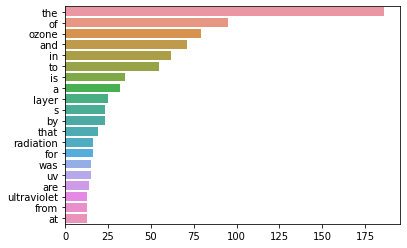

In [38]:
    xx = [v for k,v in freq_of_words.items()]
    yy = [k for k,v in freq_of_words.items()]

    sns.barplot(x=xx[0:20], y=yy[0:20])

In [43]:
def remove_stop_words(words, stop_words):
    meaningful_text = [word for word in words if word not in stop_words]
    freq_of_meaningful_words = count_frequency(meaningful_text)
    freq_of_meaningful_words = {k:v for k,v in sorted(freq_of_meaningful_words.items(),
                                key=lambda item: item[1], 
                                reverse=True)}
    return freq_of_meaningful_words

In [44]:
stop_words = ['o', 'm', 'and', 'the', 'a', 'of', 'to', 'in', 'about', 'to', 'is', 'an',
                 'by', 'that', 'for', 'was', 'were', 'are', 'from', 'at', 'it',
                 'as', 'be', 'these', 'on', 'with', 'this', 'have', 'has',
                 'other', 'because', 'can', 'its', 'out', 'into', 'or', 'over',
                 'all', 'most', 'which', 'less', 'while', 'above', 'than', 's']

In [46]:
filtered_collection = remove_stop_words(plain_text, stop_words)

<AxesSubplot:>

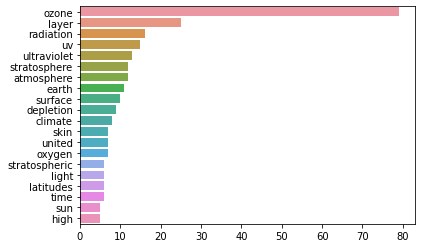

In [47]:
xxx = [v for k,v in filtered_collection.items()]
yyy = [k for k,v in filtered_collection.items()]

sns.barplot(x=xxx[0:20], y=yyy[0:20])